## Data Analysis of Creative Sector Survey


This notebook aims to analyze a dataset from a survey in the creative sector. 
The focus is on comparing two specific roles: 'Business Professional' and 'Civic and/or Social Service Worker'. 
The analysis is broken down into several key questions.


### Data Loading and Preparation

In [1]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the correct column names
df = pd.read_excel('2023-cleaned-survey.xlsx', engine='openpyxl')
# Filter the data for the roles of interest
roles = ['Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)',
         'Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)']
social_df = df[df['Describe Your Primary Role in Creative Sector'] == 'Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)']
business_df = df[df['Describe Your Primary Role in Creative Sector'] == 'Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)']

In [2]:
# manually filter base on semantics
social_df = social_df[['Describe Your Primary Role in Creative Sector',
            'How many art events did you attend or venues did you visit per month before 2020?.1',
            'Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an average month?',
            'Which art disciplines have you experienced in the past year?.1',
            'How large is your current organization?',
            'Would you be interested in volunteering your skills through our VLPA program?.1',
            'Please estimate your yearly contributions (financial or in-kind) to art organizations:.1',
            'Do you have relatives or friends working in the arts?.1']]

#column renaming
social_df = social_df.rename(columns={
                        'Describe Your Primary Role in Creative Sector': 'Role',
                        'How many art events did you attend or venues did you visit per month before 2020?.1': 'Pre-COVID Art Event Attendance', 
                        'Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an average month?': 'Post-COVID Art Event Attendance',
                        'Which art disciplines have you experienced in the past year?.1':'Art Discipline',
                        'How large is your current organization?':'Company Size',
                        'Would you be interested in volunteering your skills through our VLPA program?.1': 'VLPA Program Interest',
                        'Please estimate your yearly contributions (financial or in-kind) to art organizations:.1': 'Art Contribution',
                        'Do you have relatives or friends working in the arts?.1': 'Friends/Family Working in Art'})

In [3]:
business_df = business_df[['Describe Your Primary Role in Creative Sector',
                            'Prior to 2020, how many arts events would you attend, and/or arts venues would you visit, in an average month?',
                            'Post pandemic restrictions (2022), how many arts events do you attend, and/or arts venues do you visit, in an average month?',
                            'Arts Disciplines Experienced in Last Year',
                            'Current Company Size',
                            'Would you be interested in volunteering your skills through our VLPA program?',
                            'Yearly Contributions to Arts Organizations',
                            'Relationships with Individuals in Arts']]

business_df = business_df.rename(columns={
                        'Describe Your Primary Role in Creative Sector': 'Role',
                        'Prior to 2020, how many arts events would you attend, and/or arts venues would you visit, in an average month?': 'Pre-COVID Art Event Attendance', 
                        'Post pandemic restrictions (2022), how many arts events do you attend, and/or arts venues do you visit, in an average month?': 'Post-COVID Art Event Attendance',
                        'Arts Disciplines Experienced in Last Year':'Art Discipline',
                        'Current Company Size':'Company Size',
                        'Would you be interested in volunteering your skills through our VLPA program?': 'VLPA Program Interest',
                        'Yearly Contributions to Arts Organizations': 'Art Contribution',
                        'Relationships with Individuals in Arts': 'Friends/Family Working in Art'})

In [4]:
combined_df = pd.concat([social_df, business_df], axis=0)
combined_df = combined_df.reset_index(drop=True)

In [5]:
combined_df.head()

,Role,Pre-COVID Art Event Attendance,Post-COVID Art Event Attendance,Art Discipline,Company Size,VLPA Program Interest,Art Contribution,Friends/Family Working in Art
0,Civic and/or Social Service Worker (Social wor...,3-4,1-2,Digital Art,Medium: 50-249 employees,Unsure,NaN,No
1,Civic and/or Social Service Worker (Social wor...,3-4,None,Performance Art,Medium: 50-249 employees,No,NaN,No
2,Civic and/or Social Service Worker (Social wor...,1-2,5 or more,Dance,Micro: 1-9 employees,No,$250,Yes
3,Civic and/or Social Service Worker (Social wor...,1-2,5 or more,Music,Large: 250+ employees,Unsure,$1000,No
4,Civic and/or Social Service Worker (Social wor...,1-2,None,Digital Art,Large: 250+ employees,Yes,$250,Yes


### For these two roles, what is the difference between how many arts events they visited in a single month on average pre- and post- COVID? Use figures to justify and demonstrte the reasoning for your answer.

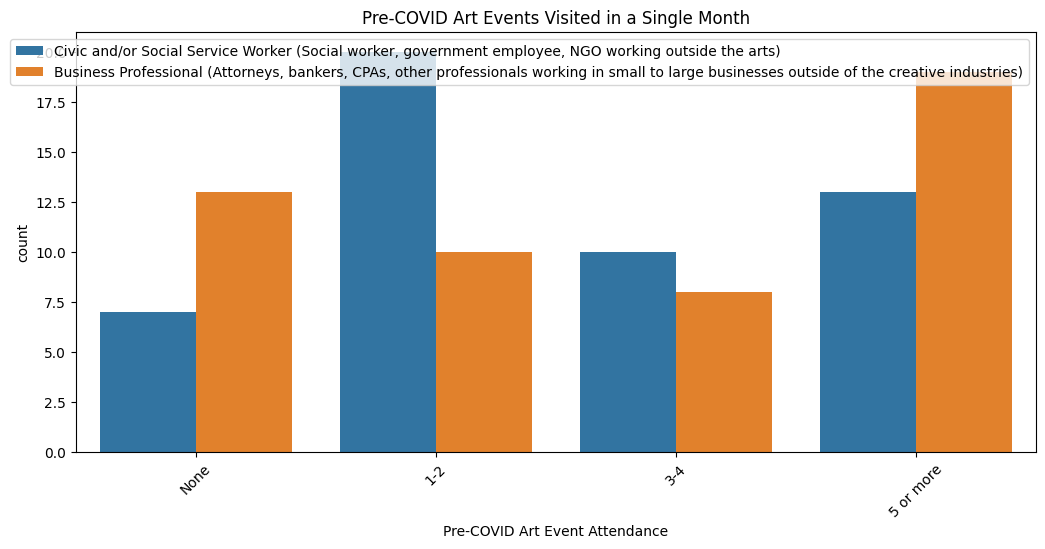

In [6]:
plt.figure(figsize=(12, 6))
order = ['None', '1-2', '3-4', '5 or more']
sns.countplot(data=combined_df, x='Pre-COVID Art Event Attendance', hue='Role', order=order)
plt.title("Pre-COVID Art Events Visited in a Single Month")
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
plt.xticks(rotation=45)
plt.show()

From here we can see that before the pandemic, most of the social workers attend art event about 1-2 times a year, whereas business professional either don't attend at all, or attend many times (5 or more).

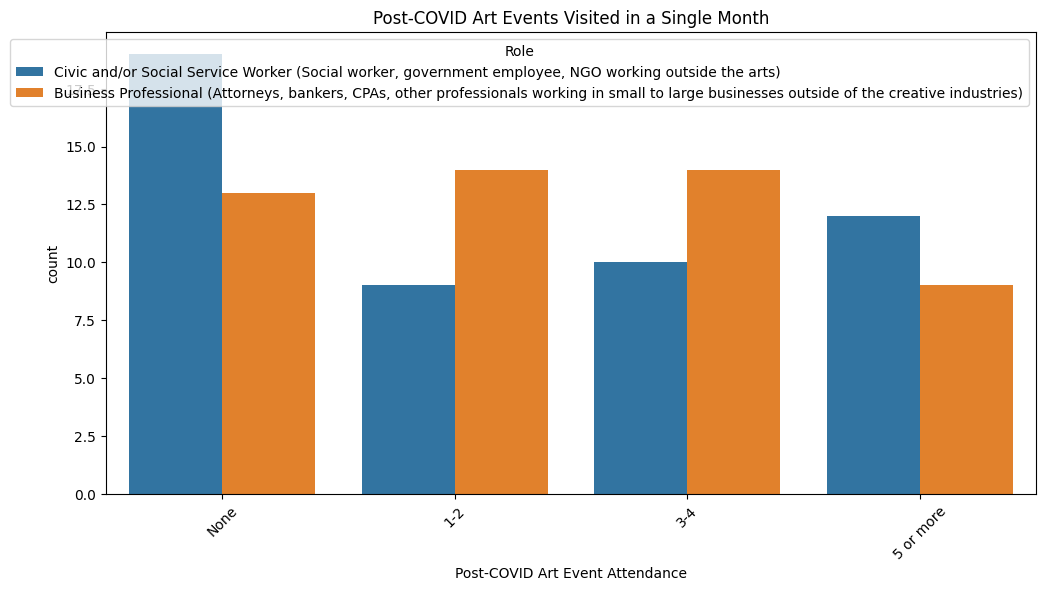

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Post-COVID Art Event Attendance', hue='Role', order=order)
plt.title("Post-COVID Art Events Visited in a Single Month")
plt.xticks(rotation=45)
plt.show()

After the pandemic, from the chart we can see business professional still like to attend art event occationally, but a lot of social workers decided not to attend art event at all maybe due to more work for them in general?

### What arts disciplines are generally pursued/experienced by respondents in these roles and at what distribution?

In [8]:
def to_pascal_case(s):
    if isinstance(s, str):
        return ''.join(w.capitalize() for w in s.split())
    else:
        return s
combined_df['Art Discipline'] = combined_df['Art Discipline'].apply(to_pascal_case)

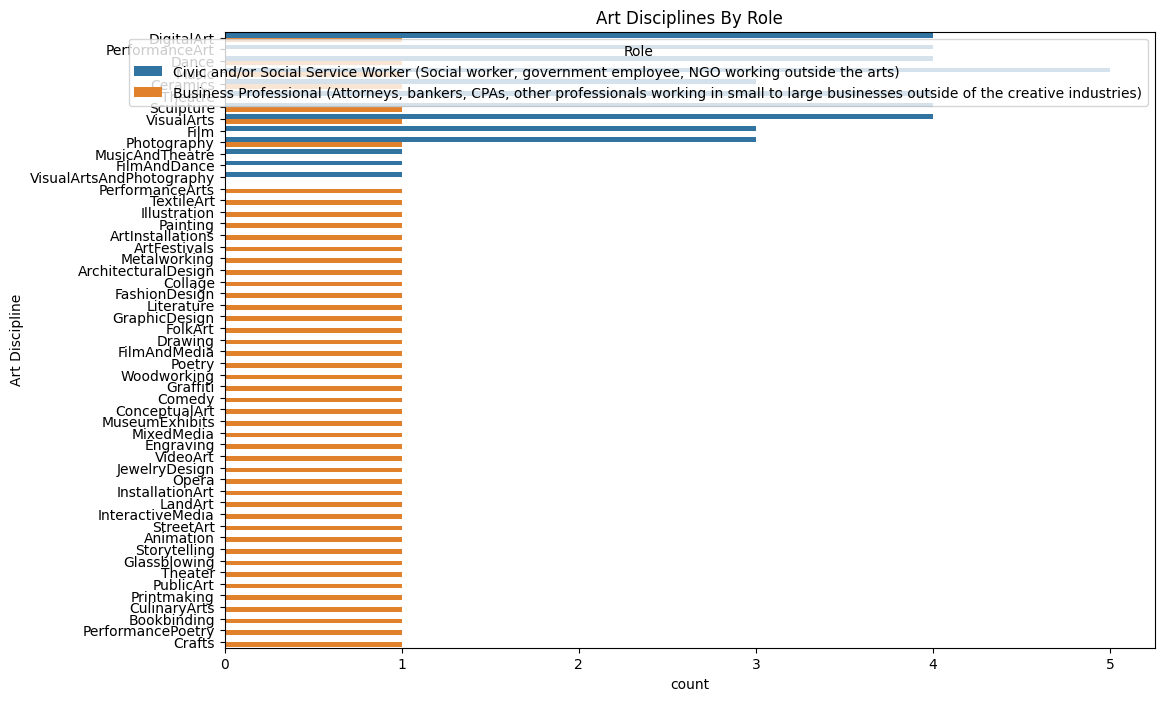

In [9]:
#need to make this camel case!!!
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, y="Art Discipline", hue='Role')
plt.title("Art Disciplines By Role")
plt.show()

From this chart, we can see business professionals' art hobbies are more concentrated whereas social worker is more varied. Digital art and ceramics are the most popular category among business workers, whereas social worker love many different things.

### What areas of expertise are represented in these two roles?

Unfortunately, we are unable to answer the question due to expertise-related data gone completely missing.

### What are the distributions of sizes for companies/organizations for these two roles?

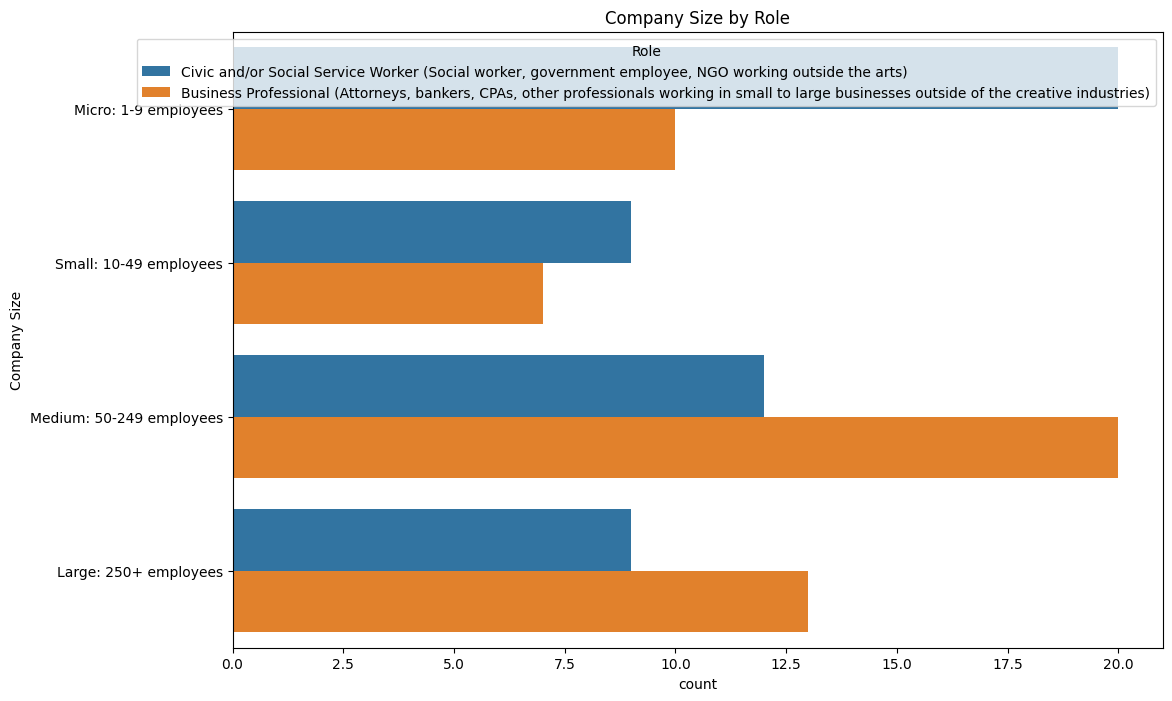

In [10]:
n_order = ['Micro: 1-9 employees', 'Small: 10-49 employees', 'Medium: 50-249 employees', 'Large: 250+ employees']
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, y="Company Size", hue='Role', order = n_order)
plt.title("Company Size by Role")
plt.show()

From this chart, we can obviously see that among micro and small company, there are a lot more social workers, however among medium and large companies the situation is opposite, with significantly more business professionals.

### To what extent are individuals of these roles interested in volunteering their skills for the VLPA program?

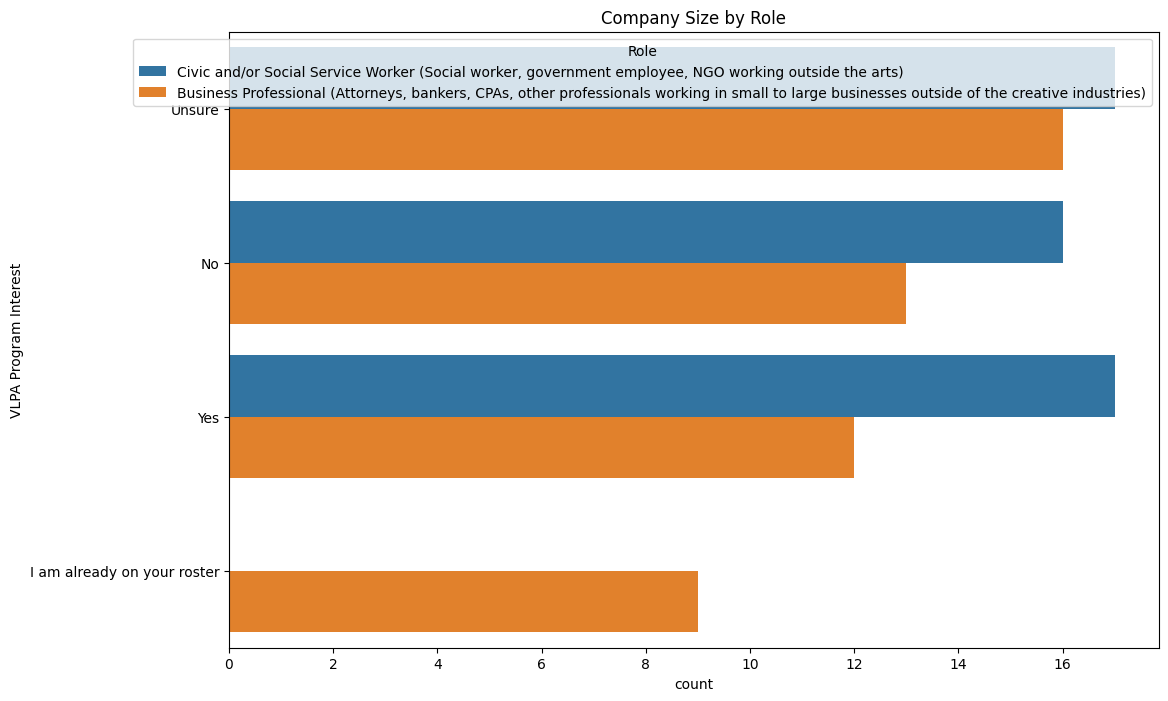

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, y="VLPA Program Interest", hue='Role')
plt.title("Company Size by Role")
plt.show()

From this chart, we see there are a lot of business professionals already enrolled in VLPA program, while there are equal amount of people unsure among business professionals and social worker, more business professionals are interested in VLPA program than social workers.

### What is the distribution of yearly financial or in-kind distributions to arts organizations for these two roles?

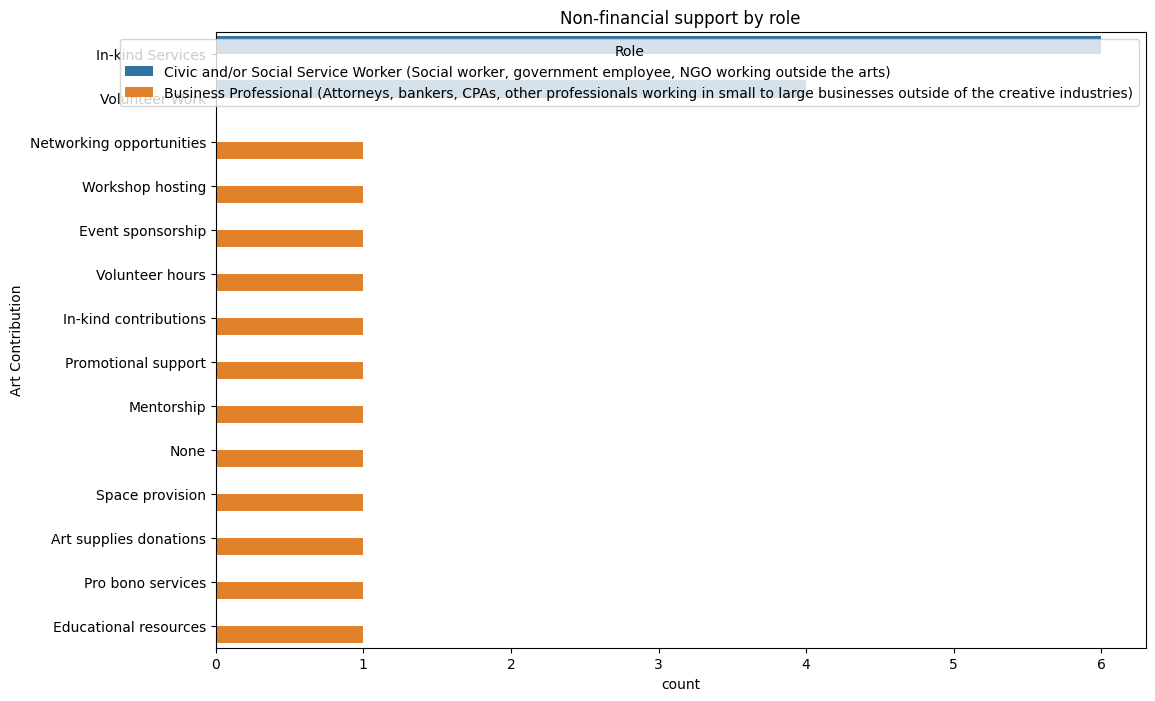

In [12]:
non_numerical_mask = ~combined_df['Art Contribution'].astype(str).str.contains(r'\d')
non_numerical_df = combined_df[non_numerical_mask]
plt.figure(figsize=(12, 8))
sns.countplot(data=non_numerical_df, y="Art Contribution", hue='Role')
plt.title("Non-financial support by role")
plt.show()

In [13]:
def convert_to_int(value):
    if str(value).startswith('$'):
        # Remove the dollar sign, replace commas, and convert to integer
        return int(str(value)[1:].replace(',', ''))
    return value  # Return original value if it doesn't start with a dollar sign
combined_df['Art Contribution int'] = combined_df['Art Contribution'].apply(convert_to_int)

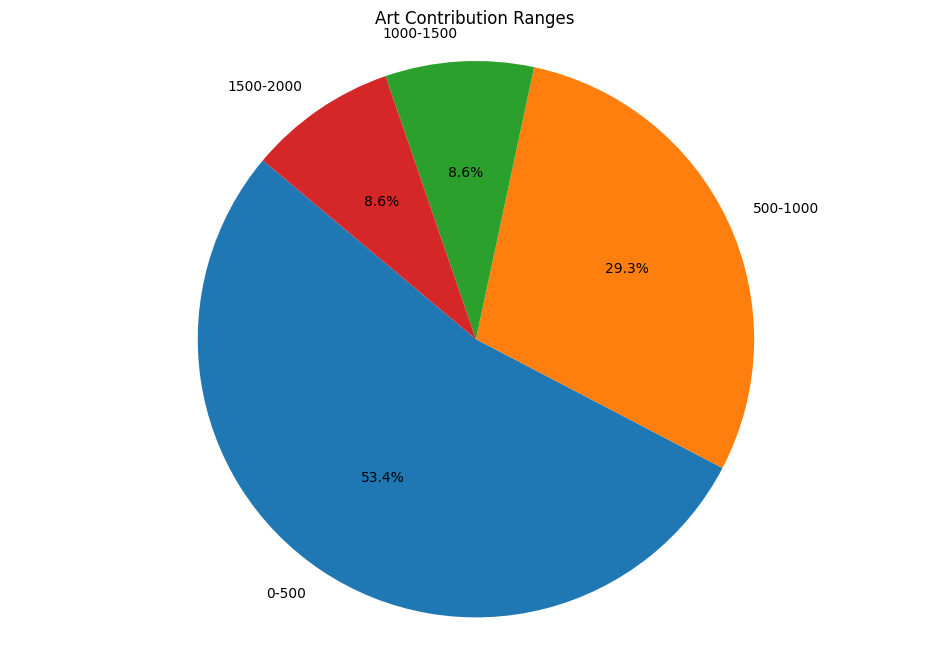

In [14]:
# Convert all values to numeric, setting errors='coerce' to convert unconvertible values to NaN
combined_df['Art Contribution int'] = pd.to_numeric(combined_df['Art Contribution int'], errors='coerce')

# Optionally, handle NaN values. Here, we'll drop rows with NaN values in the 'Art Contribution' column:
combined_df.dropna(subset=['Art Contribution int'], inplace=True)

# Now, all values in 'Art Contribution' are numeric, so you can categorize them into bins:
bin_ranges = [0, 500, 1000, 1500, 2000]  # Adjusted ranges
bin_labels = ['0-500', '500-1000', '1000-1500', '1500-2000']
combined_df['Art Contribution Ranges'] = pd.cut(combined_df['Art Contribution int'], bins=bin_ranges, labels=bin_labels)

# Group the data
grouped_data = combined_df.groupby('Art Contribution Ranges').size().reset_index(name='Counts')

# Plot the Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(grouped_data['Counts'], labels=grouped_data['Art Contribution Ranges'], autopct='%1.1f%%', startangle=140)
plt.title("Art Contribution Ranges")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Among social workers, more people prefer in-kind services than any other way of contribution. On the other hand, business professionals prefer monetary support a lot more, but they also offer a variety way of supporting such as mentorship, promotional support etc.

### What, if any, relationship is there between friends/family members working in the arts, participation in the arts (i.e., current average arts attendance), and yearly financial/in-kind contributions?

Text(652.0588549382716, 0.5, 'Counts')

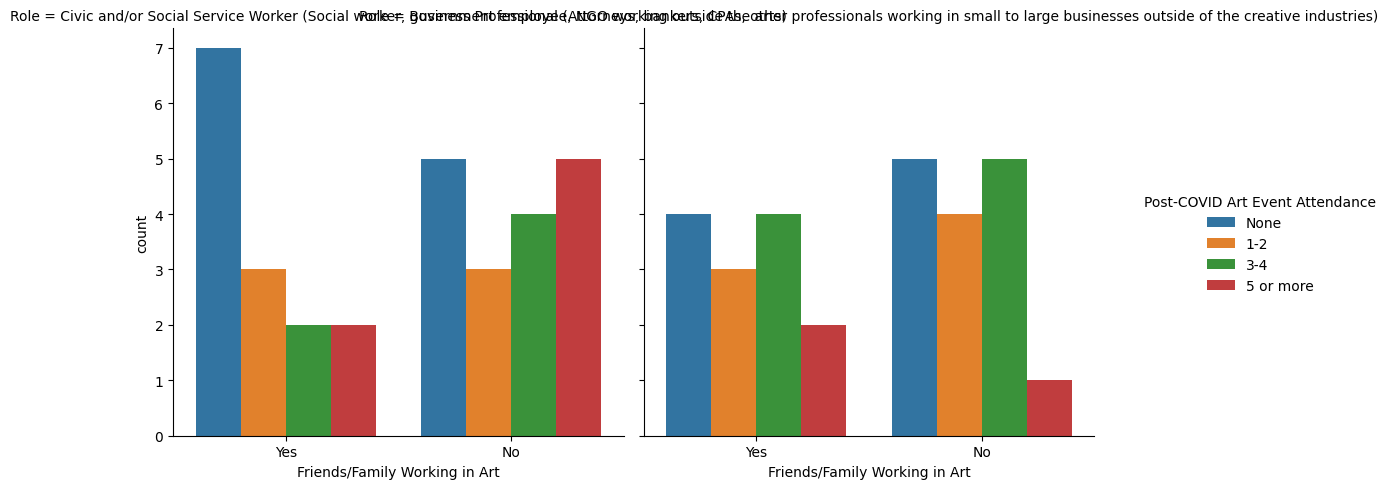

In [15]:

ordered_hue = ["None", "1-2", "3-4", "5 or more"]
sns.catplot(data=combined_df, x='Friends/Family Working in Art', 
            hue='Post-COVID Art Event Attendance', hue_order=ordered_hue,
            col='Role', kind='count')
plt.ylabel('Counts')

Above is a chart demonstrating post-COVID art event attendance base on occupation, as well as whether or not the participant has friends/family working in Art. As we can see, among business professionals friends/family working in art seems not impacting post-COVID art event attendance. However it's a lot more interesting among social workers, base on the chart, when social worker have friends working in art, they will actually go to Art event less often compared to social workers with no friends in art. Maybe that's because they think they don't need to learn more about art when they have a friend/family member in art!

Text(622.8943124035495, 0.5, 'Counts')

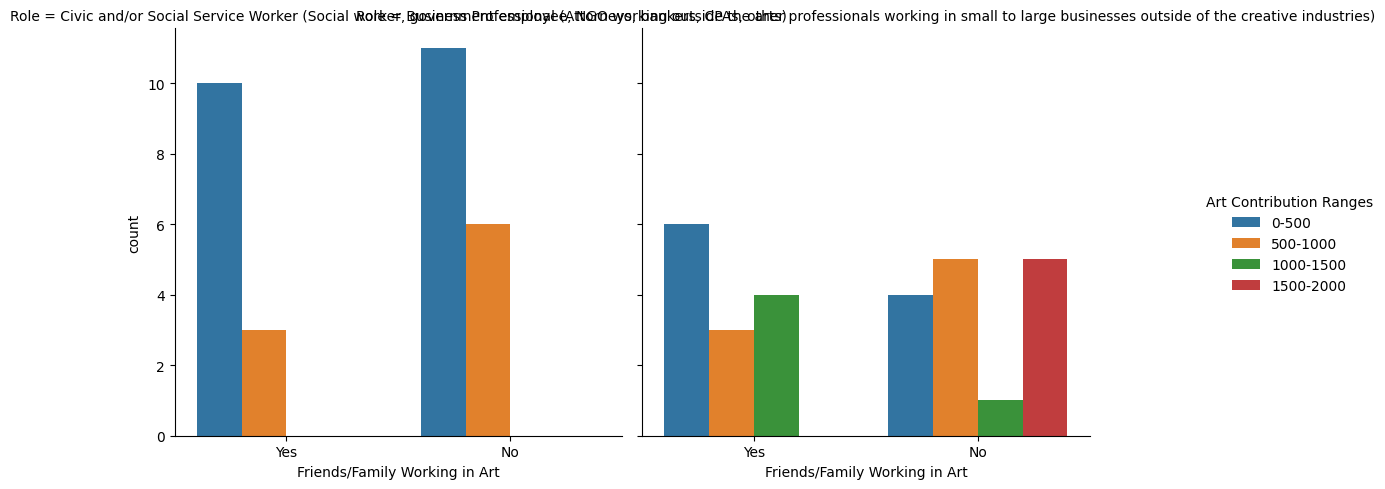

In [16]:
sns.catplot(data=combined_df, x='Friends/Family Working in Art', 
            hue='Art Contribution Ranges',
            col='Role', kind='count')
plt.ylabel('Counts')

Chart above demonstrates the relationship between friends/family working in art, occupation as well as donation amount. From the chart we can see that among business professionals, when there is no friends/family working in art people tend to donate more, and we are observing similar trends among social workers despite the contribution amount is generally lower for them.

Text(652.0588549382717, 0.5, 'Counts')

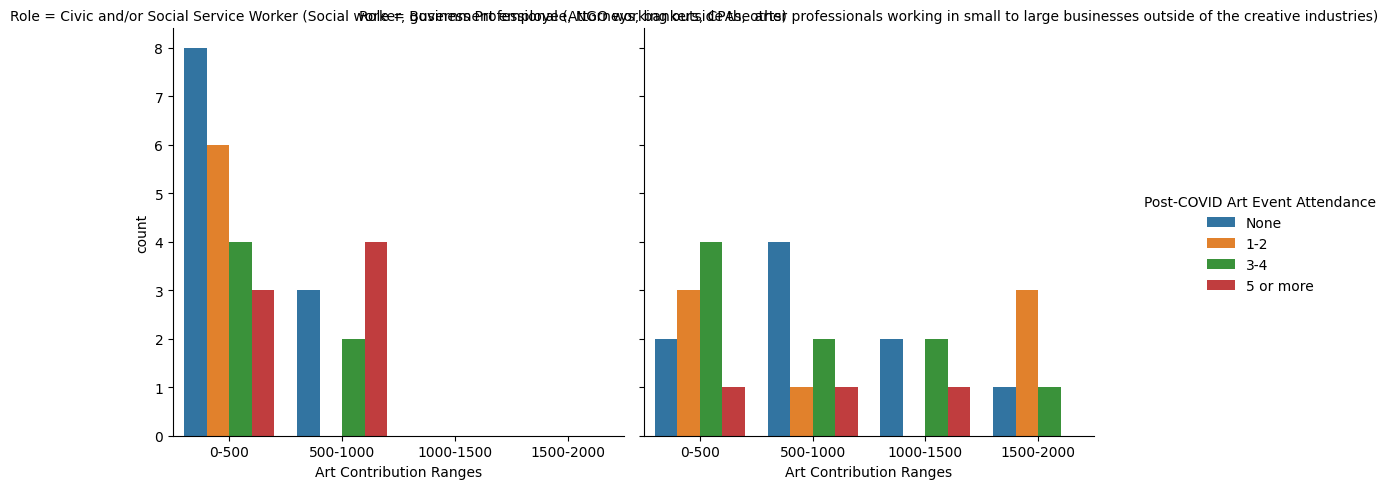

In [17]:

ordered_hue = ["None", "1-2", "3-4", "5 or more"]
sns.catplot(data=combined_df, x='Art Contribution Ranges', 
            hue='Post-COVID Art Event Attendance', hue_order=ordered_hue,
            col='Role', kind='count')
plt.ylabel('Counts')

In this chart, we are exploring relationship between art contrubution and post-COVID art even attendance, here we can see that among social workers (left), when people donate on the higher side of the spectrum (500-1000), they tend to attend a lot of events (5 or more) or they are not attending at all. On the lower side of the spectrum (0-500 group) we see that amount of people decrease when art event attendance increasing (which I think is normal). Among business professionals though things are a bit more random, we are seeing different trends of art event attendance across different art contribution ranges, which I don't think it's meaningful to summarize anything from it.